# Data Analyses Project 2018#   

The box plot is common in data analysis for investigating individual numerical variables. In this project, you will investigate and explain box plots and their uses. The boxplot function from the Python package matplotlib.pyplot can be used to create box plots. Your submission should be in the form of a repository containing a Jupyter notebook in which you detail your findings. In your notebook, you should:    

### The history of the box plot and situations in which it used ###
The boxplot or 'box and whisker plot' as it's sometimes called, is used to graphically depict groups of numerical data through their quartiles. A quartile is a type of quantile; the 1st quantile is the middle number between the lowest number and the median of a dataset, the 2nd quartile is the median itself, and the 3rd quartile is the value between the median and the highest number of the dataset. 

Quartiles can be used to rank the data values within a data set, ie: the top students in a class might be described as being part of the upper quartile. The top and bottom boundaries of the box in a boxplot are the upper quartile and lower quartile respectively.   

Percentiles indicate the value below which a given percentage of observations (or datapoints) in a given set of observations (aka dataset) falls. For instance the 20th percentile is the value below which 20% of observations in a dataset are found. Like the use of quartiles, percentiles are also used to rank the datapoints in a given population/dataset. For instance, if a student is ranked at the 90 percentile in his or her class, that student is better than 90% of the other students in the class. The 25th percentile is the 1st quartile, the 50th percentile is the median or second quartile, and the 75th percentile is the 3rd quartile.

The lines that extend from the boxes are known as 'whiskers' which indicate variability outside of the upper and lower quartiles. The space between the top and bottom of the whiskers demonstrates the dispersion or spread of the dataset. The ends of the whiskers often are used to visualise other statistical ranges, such as:
- One standard deviation above and below the mean.  
- The 9th and 91st percentile.  
- The 2nd and 98th percentile.
- The Tukey boxplot.

Datapoints outside of these upper and lower whiskers are outliers of the dataset. Outliers are plotted as individual points.      

The use of boxplots allows us to visually extimate other statistics, such as the interquartile range (the range of data between the 25th and 75th percentile), the midhinge (the average of the first and third quartile), the range (the difference between the largest and smallest values), and the trimean (a probability distribution's location defined as a weighted average of the distribution's median and its two quartiles). Boxplots are non-parametric, which means that they do not indicate the distribution within the dataset.

• Demonstrate the use of the box plot using data of your choosing.    

   
• Compare the box plot to alternatives.



https://study.com/academy/lesson/upper-quartile-definition-formula.html
https://en.wikipedia.org/wiki/Percentile
https://en.wikipedia.org/wiki/Box_plot
https://en.wikipedia.org/wiki/Trimean
https://en.wikipedia.org/wiki/Nonparametric_statistics

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib as mpl 


import matplotlib.pyplot as plt
#mpl.use('agg')

%matplotlib inline

In [6]:
#http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/

In [42]:
df = pd.read_csv("https://raw.githubusercontent.com/joanh3aly/GMIT-2-programming-project/master/gapminder.csv")
df.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


12      55
13      59
14      64
15      66
16      67
17      68
18      70
19      72
20      71
21      72
22      75
23      76
72      66
73      67
74      69
75      70
76      70
77      72
78      73
79      74
80      76
81      77
82      78
83      79
108     68
109     69
110     70
111     70
112     71
113     72
        ..
1482    76
1483    77
1484    78
1485    79
1486    80
1487    81
1572    43
1573    48
1574    52
1575    54
1576    57
1577    59
1578    61
1579    63
1580    66
1581    68
1582    70
1583    71
1596    69
1597    70
1598    70
1599    71
1600    72
1601    72
1602    74
1603    75
1604    76
1605    77
1606    78
1607    79
Name: lifeExp, Length: 360, dtype: int64


/Users/joanhealy1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/joanhealy1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/joanhealy1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

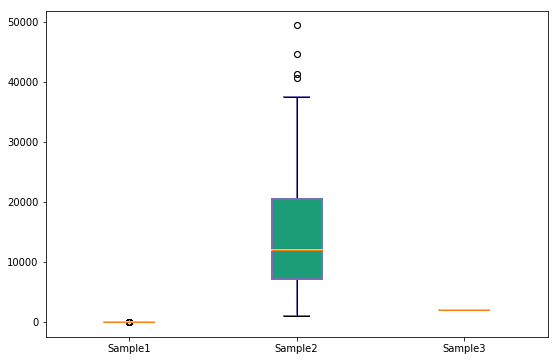

In [62]:
np.random.seed(10)
collectn_1 = np.random.normal(100, 10, 200)
collectn_2 = np.random.normal(80, 30, 200)
collectn_3 = np.random.normal(90, 20, 200)
collectn_4 = np.random.normal(70, 25, 200)



collection = df.loc[df['continent']=='Europe']


#collection['pop'] = collection['pop'].astype(int)
collection['lifeExp'] = collection['lifeExp'].astype(int)
collection['gdpPercap'] = collection['gdpPercap'].astype(int)
collection['year'] = collection['year'].astype(int)

print(collection['lifeExp'])

## combine these different collections into a list    
data_to_plot = [ collection['lifeExp'], collection['gdpPercap'], collection['year']]

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

## add patch_artist=True option to ax.boxplot() 
## to get fill color
bp = ax.boxplot(data_to_plot, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)


# Create the boxplot
bp = ax.boxplot(data_to_plot)

## Custom x-axis labels
ax.set_xticklabels(['Sample1', 'Sample2', 'Sample3', 'Sample4'])    

## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
    

# Save the figure
#fig.savefig('fig1.png', bbox_inches='tight')